In [80]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [82]:
#image augmentation
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                rotation_range=180,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [83]:
x_train=train_datagen.flow_from_directory(r'E:\journal\Nalaya thiran\Flowers-Dataset\flowers',
                                         target_size=(64,64),
                                         batch_size=24,
                                         class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [84]:
x_test=test_datagen.flow_from_directory(r'E:\journal\Nalaya thiran\Flowers-Dataset\flowers',
                                       target_size=(64,64),
                                       batch_size=24,
                                       class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [86]:
#create model
model=Sequential()

In [87]:
#Add layers(Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(5,activation='softmax'))


In [88]:
#compile the model
model.compile(loss="categorical_crossentropy" , metrics= ["accuracy"], optimizer= "adam" )


In [89]:
len(x_train)

180

In [90]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train))

Epoch 1/10
180/180 [==============================] - 22s 115ms/step - loss: 1.2897 - accuracy: 0.4797
Epoch 2/10
180/180 [==============================] - 19s 105ms/step - loss: 1.0538 - accuracy: 0.5847
Epoch 3/10
180/180 [==============================] - 19s 105ms/step - loss: 0.9972 - accuracy: 0.5995
Epoch 4/10
180/180 [==============================] - 19s 107ms/step - loss: 0.9569 - accuracy: 0.6185
Epoch 5/10
180/180 [==============================] - 19s 104ms/step - loss: 0.9224 - accuracy: 0.6403
Epoch 6/10
180/180 [==============================] - 19s 104ms/step - loss: 0.9061 - accuracy: 0.6461
Epoch 7/10
180/180 [==============================] - 19s 106ms/step - loss: 0.8892 - accuracy: 0.6544
Epoch 8/10
180/180 [==============================] - 19s 107ms/step - loss: 0.8567 - accuracy: 0.6569
Epoch 9/10
180/180 [==============================] - 19s 105ms/step - loss: 0.8554 - accuracy: 0.6611
Epoch 10/10
180/180 [==============================] - 19s 104ms/step - l

In [91]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

In [92]:
#Save the model
model.save("flowers.h5")

In [93]:
new_model = tf.keras.models.load_model('flowers.h5')

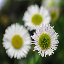

In [94]:
testImg = image.load_img(r'E:\journal\Nalaya thiran\Flowers-Dataset\flowers\daisy\img.jpg', target_size = (64,64))
testImg

In [95]:
#Test the model
arrayImg = image.img_to_array(testImg)
arrayImg

array([[[210., 218., 239.],
        [194., 202., 223.],
        [175., 182., 201.],
        ...,
        [ 87., 113.,  65.],
        [ 65.,  95.,  45.],
        [ 63.,  89.,  41.]],

       [[201., 209., 232.],
        [180., 188., 207.],
        [162., 168., 184.],
        ...,
        [ 74., 108.,  57.],
        [ 67.,  94.,  39.],
        [ 64.,  87.,  41.]],

       [[188., 195., 221.],
        [169., 177., 196.],
        [150., 157., 167.],
        ...,
        [ 63.,  95.,  45.],
        [ 65.,  88.,  42.],
        [ 67.,  86.,  41.]],

       ...,

       [[ 24.,  32.,  17.],
        [ 20.,  28.,  17.],
        [ 25.,  34.,  17.],
        ...,
        [ 25.,  37.,  15.],
        [ 30.,  44.,  19.],
        [ 30.,  48.,  22.]],

       [[ 26.,  34.,  19.],
        [ 23.,  31.,  20.],
        [ 29.,  38.,  21.],
        ...,
        [ 25.,  34.,  13.],
        [ 27.,  43.,  17.],
        [ 30.,  46.,  20.]],

       [[ 29.,  37.,  22.],
        [ 28.,  36.,  21.],
        [ 34.,  

In [96]:
arrayImg = np.expand_dims(arrayImg , axis = 0)
predictImg = model.predict(arrayImg)
predictImg


1/1 [==============================] - 0s 87ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [97]:
labels = ["daisy" , "dandelion", "rose", "sunflower", "tulip"]
np.argmax(predictImg)

0

In [98]:
labels[np.argmax(predictImg)]

'daisy'